# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 1</p>
## <p style="text-align: center;">Casey Copeland, EID: cmc6793</p>
## <p style="text-align: center;">Total points: 55</p>
## <p style="text-align: center;">Due: Wednesday, **Sep 10** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). **This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework.**

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

# Question 1: MLOps (10 pts)
Read this [article](https://towardsdatascience.com/what-is-mlops-everything-you-must-know-to-get-started-523f2d0b8bd8) "What is MLOps — Everything You Must Know to Get Started", which gives a quick walkthrough of the machine learning development lifecycle and explains how MLOps come into play, or watch this [video](https://www.youtube.com/watch?v=06-AZXmwHjo) which you may find interesting.

1. (**4 pts**) Use your own words to describe what MLOps is, and what challenges MLOps address. Limit your answer to one paragraph.

2. (**6 pts**) Describe what the main phases in MLOps are. Your answer should be 2-3 paragraphs.


## Answer:

1.1 
MLOps goes beyond simply Machine Learning. It is the entire system necessary to use ML across departments to standardize and streamline models used for different business problems. MLOps challenges include a shortage of capable data scientist, the constant change of business objectives which in turn requires continuous model training and development, communication issues between tech teams and non-tech business teams, and the risks and costs of the ML systems not doing what they are built to do. 

1.2 
    The first phase is defining the business objective and key performance metrics you want the ML system to solve/discover. Translate these objects into ML problems. Secondly, you must find appropriate input data. Then you will prep and process your chosen data so it is clean, compatible, and cost-efficient with your system, pipelines. Next comes data science where you train and experiment with your pipelines and models to find the optimal model that is reproducible. 
    Once the above steps are completed you will build and automate the chosen, optimal ML piplines. Once build, you will deploy the production system to be used for MLOps and the original business goal you framed as an ML problem. And finally, you will monitor, optimize, and maintain models as results come in, time passes, and business objectives shift. 

# Question 2: Applications of Machine Learning (5 pts)
Read this [article](https://builtin.com/data-science/data-science-applications-examples) "17 Data Science Applications & Examples" and pick one of the data science systems used by various organizations according to this blog. 

For this system you have chosen, answer the following questions. Please limit your answer to one paragraph:

1. What kind of machine learning problem is involved (e.g. classification, regression, clustering, outlier detection,...) in this system?
2. Speculate on what kind of data may be needed and how the results can be useful to the organization.
3. What do you think are the ethical implications of using machine learning in a domain like this?

## Answer:

Airbnb: search that highlights hip areas (Airbnb's search algorithm)

Originally to pull up booking options for Airbnb customers they used an exponential demotion function (based on distance between center of city & listing location, applied on top of listings quality score) and then a sigmoid demotion curve (creating a positive lift). However, Airbnb could not get optimal results by hardcoding so they turned to Machine Learning The model estimates conditional probability of booking in a location, given where the person searched, normalized by the ammount of listings in that location. They refine the model to have a 2nd conditional probablility based on the cities people booked in & all the cities they searched to get there. Airbnb needs historical user data to create this model such as search history and booking history. Ethical issues caused by this model could be bais/skewing towards neighborhood possibly more upscale, white, or gentrified. This model creates demand in already popular areas, making them hotspots for more development and resulting in other neighborhoods not benefitting for the influx of tourism and new businesses. 

# Question 3: Simpson's Paradox (10 pts)
A data scientist should be careful about drawing unwarranted conclusions about any data that is presented. One of the 'gotchas' that can happen even in apparently very simple tabular summaries, is called Simpson's paradox.

Read this [article](https://www.covid-datascience.com/post/israeli-data-how-can-efficacy-vs-severe-disease-be-strong-when-60-of-hospitalized-are-vaccinated), which explains why the computed efficacy of the Pfizer vaccine is misleadingly low (67.5%) when you lump all people together, but once you stratify people by age (which is the right thing to do), you get much higher efficacy numbers.

1.(**5 pts**) Explain in your own words what Simpson's paradox is, and how this 'paradox' can happen in real data.

2.(**5 pts**) Find and mention another example of Simpson's paradox (but not any of the 3 examples given in the Wikipedia entry for 'Simpson's paradox'), state why the paradox appeared in your chosen example. Also give a reference (URL) to your source for the chosen example.

## Answer:

3.1 Simpson's Paradox is when observational data has misleading results due to confounding factors. Trends reverse when you group the data properly (in this article goruping by older people and younger people). 

3.2 Racial Bias in the criminal justice system.
https://www.urban.org/urban-wire/simpsons-paradox-logic-racial-disparities

The FBI reported rate for justifiable homicides is 2%. However when you take into account race, 11.41% of white-on-black homicides are ruled justifiable, while only 1.2% of black-on-white homicides are ruled justifiable. This demonstrates simpsons paradox in the FBI's reporting and racial disparity in the US criminal justice system. When you also take into account the population size of Whites versus Blacks in the US, many more White Americans are being ruled 'justifiable homicide' versus their Black counterparts. 

# Question 4: Ridge and Lasso Regression (30 pts)

Download the dataset **Admission.csv** from Canvas and use the following codes to import the Admission dataset in Python. 

There are 7 features in the dataset:

1. GRE score
2. TOEFL score
3. University Rating
4. SOP(Statement of Purpose)
5. LOR(Letter of Recommendation)
6. CGPA
7. Research

And the target is **Chance of Admission**.

In [113]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
#from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
#uploaded = files.upload()

In [114]:
# Codes below will work for both Google Colab and Jupyter Notebook.
import numpy as np
import pandas as pd
import random
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

## Load the dataset into pandas DataFrame
df = pd.read_csv('Admission.csv', index_col=0)
df = df.replace([np.inf, -np.inf], np.nan) # 
df = df.fillna(0) # Replace all the NaN values with 0

In [115]:
df.columns # Show you all the columns in this file

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

In [116]:
df.head() # Show you the first 5 rows in this file

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [117]:
Y = df['Chance_of_Admit'] # The column named Chance_of_Admit is used as the target, and we store it in y
X = df.drop(['Chance_of_Admit'], axis=1) # We keep the remaining columns as the features, and store them in x

1)(**2 pts**) Split the data into a training set(75% of data) and a test set(25% of data), using the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function with random_state = 50. Then scale the data (not including target) so that each of the independent variables would have zero mean and unit variance. You can use the [sklearn.preprocessing.scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) function for this. Print the first 5 rows of the training set after scaling.

2)(**5 pts**) Use [sklearn.linear_model.Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) and [sklearn.linear_model.Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) classes to do a **5-fold** cross validation using sklearn's KFold. For the sweep of the regularization parameter, we will look at a grid of values ranging from α=10^10 to α=10^−6. In Python, you can consider this range of values as follows: alpha = 10**numpy.linspace(6,-6,100) 
so that you can generate 100 uniform values between -6 to 6 as power series.

Fit the 2 regression models with scaled data and report the best chosen **α** based on cross validation as well as the corresponding scoring metric. The cross validation should happen on your training data using **MSE** as the scoring metric.

3)(**5 pts**) Run ridge and lasso regression for all of the **α** specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; different features' weights of each model should be on the same plot with different colors (3pts). 

What do you qualitatively observe when the value of the regularization parameter changes (2pts)? 

4)(**3 pts**) Take the exponential of Y_train as the target, and fit the 2 regression models again. Report the best chosen **α** based on cross validation as well as the corresponding scoring metric. Compare the results of using the original target with the results of using the exponential of the target. What do you observe? 

5)(**5 pts**) Similarly, use [sklearn.linear_model.ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) to do linear regression with different **α** values, and plot the coefficients learned for each of them (2pts). Observe the plot, then explain the pros and cons of ridge, lasso and Elastic Net models (3pts).


6)(**5 pts**) Run the following three regression models with **MSE** loss on the training data: 

a. linear regression without regularization (1pts)

b. linear regression with ridge regularization (2pts)

c. linear regression with lasso regularization (2pts)

For part (b) and (c), use only the best regularization parameters. Report the MSE and R<sup>2</sup> on the test data for each model.

7)(**5 pts**) Train the 3 models and report the metrics with the original data without scaling (3pts). 

Why do we need to scale the data before regularization (2pts)? 

## Answer:


### 4.1 Answer

In [118]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#train & test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=50)

#scaling
preprocessing.scale(X, axis=0, with_mean=True, with_std=True, copy=True)
X_train[:5]

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
Serial No.,,,,,,,
204,334,120,5,4.0,5.0,9.87,1
265,325,110,2,3.0,2.5,8.76,1
339,323,108,5,4.0,4.0,8.74,1
262,312,104,3,3.5,4.0,8.09,0
217,322,112,4,4.5,4.5,9.26,1


### 4.2 Answer

In [119]:
#alpha range to test 
alphas = 10**np.linspace(6,-6,100)

In [120]:
#KFold class creation

from sklearn.model_selection import KFold

kf = KFold(n_splits = 5)

In [121]:
#5 FOLD CROSS VALIDATION

#Lasso
print('LASSO')
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

#create for loop, Training set into 5 folds (4 folds = train, 1 fold = test - evaluate the result)
for train_index, test_index in kf.split(X_train):
    x_train, x_test = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train, y_test = Y_train.iloc[train_index], Y_train.iloc[test_index]
    
    #classifier clf
    lasso = linear_model.Lasso()
    lasso = lasso.fit(x_train, y_train) #our train model 
    
    mse = mean_squared_error(y_test, lasso.predict(x_test)) # mse of target set and prediction set
    mae = mean_absolute_error(y_test,lasso.predict(x_test))
    
    print('MSE',mse) #should give you 5 mse
    print('MAE',mae) #should give you 5 mae
    print(' ')
    

#Ridge
print('RIDGE')
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

#create for loop, Training set into 5 folds (4 folds = train, 1 fold = test - evaluate the result)
for train_index, test_index in kf.split(X_train):
    x_train, x_test = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train, y_test = Y_train.iloc[train_index], Y_train.iloc[test_index]
    
    #classifier clf
    ridge = linear_model.Ridge()
    ridge = ridge.fit(x_train, y_train) #our train model 
    
    mse = mean_squared_error(y_test, ridge.predict(x_test)) # mse of target set and prediction set
    mae = mean_absolute_error(y_test,ridge.predict(x_test))
    
    print('MSE',mse) #should give you 5 mse
    print('MAE',mae) #should give you 5 mae
    print(' ')

LASSO
MSE 0.013198100617920804
MAE 0.09070957086118375
 
MSE 0.015216851808810251
MAE 0.09562796056110633
 
MSE 0.015699040840390404
MAE 0.10251193018549322
 
MSE 0.01649030340862912
MAE 0.09955692513718267
 
MSE 0.015787731830492636
MAE 0.09830165698862434
 
RIDGE
MSE 0.005156914936203436
MAE 0.05349901456047849
 
MSE 0.003629393260149606
MAE 0.04420843363818246
 
MSE 0.00417753410286102
MAE 0.04665479400468099
 
MSE 0.0032803978382984554
MAE 0.04165684226719257
 
MSE 0.004378070986732532
MAE 0.04745288999426821
 


In [122]:
#BEST CHOSEN α BASED ON CROSS VALIDATION
#Ridge
print('Ridge')
ridgecv = RidgeCV(alphas = alphas, cv = kf, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, Y_train)
print('Using CV, the optimal alpha is:', ridgecv.alpha_)
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train, Y_train)
print('The MSE for alpha is:', mean_squared_error(Y_test, ridge4.predict(X_test)))
print(' ')
#Lasso
print('Lasso')
lassocv = LassoCV(alphas = alphas, cv = kf, max_iter = 100000)
lassocv.fit(X_train, Y_train)
print('Using CV, the optimal alpha is:', lassocv.alpha_)
lasso = Lasso(alpha = lassocv.alpha_, normalize = True)
lasso.fit(X_train, Y_train)
print('The MSE for alpha is:', mean_squared_error(Y_test, lasso.predict(X_test)))
print(' ')

Ridge
Using CV, the optimal alpha is: 0.017475284000076828
The MSE for alpha is: 0.0044956388451210996
 
Lasso
Using CV, the optimal alpha is: 0.0006135907273413163
The MSE for alpha is: 0.004613817489802236
 


### 4.3 Answer

As the regularization parameter (alpha) becomes larger, the coefficients move towards zero. A too large alpha causes the features to be insignificant (coefficients of zero). The tuning parameter is too large in this case, we have over-shrunk, the model is biased, and will result in a large MSE and inaccurate model. 

As the regularization parameter (alpha) becomes smaller, the coefficients become larger. If alpha is too small, we risk overfitting, allowing too much noise/variance in the model. This will also result in a large MSE and inaccurate model. 

You want the 'juuust right' (goldilocks) regularization parameter, where MSE is it's lowest for the model. 

In [123]:
#FEATURE IMPORTANCE, PLOT COEFFICIENTS FOR EVERY ALPHA 

Text(0, 0.5, 'coefficients')

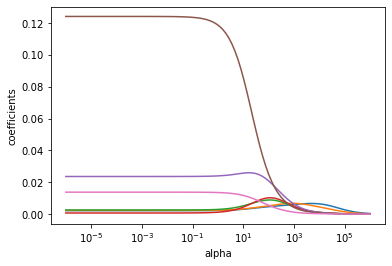

In [124]:
#Ridge
coefsR = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_train, Y_train)
    coefsR.append(ridge.coef_)
    
np.shape(coefsR) #(100, 7)

ax = plt.gca()
ax.plot(alphas, coefsR)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('coefficients')

Text(0, 0.5, 'weights')

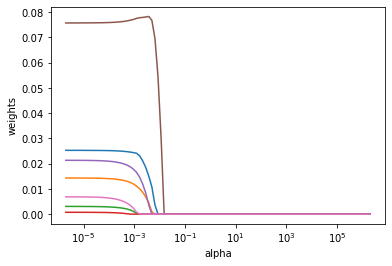

In [125]:
#Lasso
from sklearn.preprocessing import scale 
lasso = Lasso(max_iter = 10000, normalize = True)
coefsL = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), Y_train)
    coefsL.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefsL)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

### 4.4 Answer
The alphas stay roughly the same, each becoming a bit small for both Ridge & Lasso. However, the MSE for both models goes way up when we use an exponential Y_train. Using regular Y_train resulted in more accurate models.

In [126]:
Y_train2 = np.exp(Y_train) 

In [127]:
#BEST CHOSEN α BASED ON CROSS VALIDATION
#Ridge
print('Ridge Exp')
ridgecv = RidgeCV(alphas = alphas, cv = kf, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, Y_train2)
print('Using CV, the optimal alpha is:', ridgecv.alpha_)
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train, Y_train2)
print('The MSE at this alpha is:', mean_squared_error(Y_test, ridge4.predict(X_test)))
print(' ')
#Lasso
print('Lasso Exp')
lassocv = LassoCV(alphas = alphas, cv = kf, max_iter = 100000)
lassocv.fit(X_train, Y_train2)
print('Using CV, the optimal alpha is:', lassocv.alpha_)
lasso = Lasso(alpha = lassocv.alpha_, normalize = True)
lasso.fit(X_train, Y_train2)
print('The MSE at this alpha is:', mean_squared_error(Y_test, lasso.predict(X_test)))
print(' ')

Ridge Exp
Using CV, the optimal alpha is: 0.02310129700083158
The MSE at this alpha is: 1.89476840915737
 
Lasso Exp
Using CV, the optimal alpha is: 0.001072267222010321
The MSE at this alpha is: 1.8877222215209095
 


### 4.5 Answer

Each of these models handles the bias-variance trade off slightly different. 

Ridge lowers variance and bias by using a regulation parameter and a penalty (L2) term. Ridge decreases the complexity of model, but does not reduce the number of variables, therefore if you need feature reduction ridge is not the best model. 

Lasso has a similar approach to Ridge, except Lasso tends to set coefficients to absolute zero due to its penalty term. We see this in our coefficient plots where the ridge coefficients do not reach zero until a larger alpha value, while lasso coefficients reach zero at a much smaller alpha. Lasso is not a good model to use when predictors is > observations and when 2 or more variables are highly collinear. Lasso can cause bias when Y is too dependent on one variable.

Elastic Nets combines the regularization of both Ridge and Lasso, it can be more computationally expensive because of this. 

In our models, the MSE is relatively the same, and low, for all 3 models: Ridge, Lasso, and Elastic Nets. Alpha is much larger for Ridge(.0174) when compared to Lasso(.0006) & Elastic Nets(.0001). And we see a bit more coefficient complexity with Elastic Nets versus Lasso. 

Elastic Net
Using CV, the optimal alpha is: 0.00011497569953977356
The MSE at this alpha is: 0.0044882080958358874
 


Text(0, 0.5, 'coefficients')

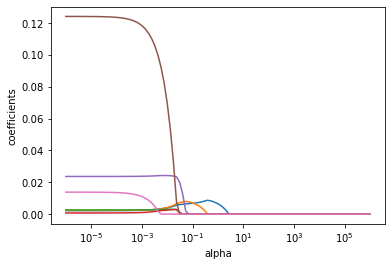

In [128]:
from sklearn.linear_model import ElasticNetCV, ElasticNet
elasticnet = linear_model.ElasticNet()

#CV
print('Elastic Net')
ENcv = ElasticNetCV(alphas = alphas, cv = kf, normalize = True)
ENcv.fit(X_train, Y_train)
print('Using CV, the optimal alpha is:', ENcv.alpha_)
EN4 = ElasticNet(alpha = ENcv.alpha_, normalize = True)
EN4.fit(X_train, Y_train)
print('The MSE at this alpha is:', mean_squared_error(Y_test, EN4.predict(X_test)))
print(' ')

coefsEN = []

for a in alphas:
    elasticnet.set_params(alpha = a)
    elasticnet.fit(X_train, Y_train)
    coefsEN.append(elasticnet.coef_)
    
np.shape(coefsEN) #(100, 7)

ax = plt.gca()
ax.plot(alphas, coefsEN)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('coefficients')

### 4.6 Answer


In [129]:
ols = linear_model.LinearRegression()
ols = ols.fit(X_train, Y_train)
print('The linear regression MSE is:', mean_squared_error(Y_test, ols.predict(X_test)))
print('The linear regression R^2 is:', ols.score(X_train, Y_train))
print(' ')
ridge = linear_model.Ridge(alpha = 0.017475284000076828)
ridge.fit(X_train, Y_train)
print('The Ridge MSE is:', mean_squared_error(Y_test, ridge.predict(X_test)))
print('The Ridge R^2 is:', ridge.score(X_train, Y_train))
print(' ')
lasso = linear_model.Lasso(alpha = 0.0006135907273413163)
lasso = lasso.fit(X_train, Y_train)
print('The lasso MSE is:', mean_squared_error(Y_test, lasso.predict(X_test)))
print('The lasso R^2 is:', lasso.score(X_train, Y_train))



The linear regression MSE is: 0.004526319242200027
The linear regression R^2 is: 0.8193370700006861
 
The Ridge MSE is: 0.004526158463578651
The Ridge R^2 is: 0.8193370367899377
 
The lasso MSE is: 0.00455449597201753
The lasso R^2 is: 0.8190885789866322


### 4.7 Answer

We normalized the variables beforehand so they are all on the same scale and the regularization term affects each one similarly.

In [130]:
#a. linear regression without regularization (1pts)
print('Models performance on original data: ')
print(' ')
ols = linear_model.LinearRegression()
ols = ols.fit(X, Y)
print('The linear regression MSE is:', mean_squared_error(Y_test, ols.predict(X_test)))
print('The linear regression R^2 is:', ols.score(X, Y))
print(' ')
ridge = linear_model.Ridge(alpha = 0.017475284000076828)
ridge.fit(X, Y)
print('The Ridge MSE is:', mean_squared_error(Y_test, ridge.predict(X_test)))
print('The Ridge R^2 is:', ridge.score(X, Y))
print(' ')
lasso = linear_model.Lasso(alpha = 0.0006135907273413163)
lasso = lasso.fit(X, Y)
print('The lasso MSE is:', mean_squared_error(Y_test, lasso.predict(X_test)))
print('The lasso R^2 is:', lasso.score(X, Y))

Models performance on original data: 
 
The linear regression MSE is: 0.004265270428719118
The linear regression R^2 is: 0.8034713719824395
 
The Ridge MSE is: 0.004265135376878355
The Ridge R^2 is: 0.803471352862373
 
The lasso MSE is: 0.004305615366164559
The lasso R^2 is: 0.8030250210393687
